In [1]:
!pip install --quiet -U langchain_openai langchain_core langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.8 MB/s eta 0:00:00


In [2]:
import os, getpass
def _set_env(var:str):
  os.environ[var] = getpass.getpass(f"{var}: ")

_set_env('OPENAI_API_KEY')

OPENAI_API_KEY: ··········


In [3]:
from langchain_openai import ChatOpenAI

def multiply(a:int, b:int):
  '''
  Multiply two numbers
  '''
  return a*b


def add(a:int, b:int):
  '''
  Add two numbers
  '''
  return a+b;

def divide(a:int, b:int):
  '''
  Divide two numbers
  '''
  return a/b;


tools = [multiply, add, divide]
llm = ChatOpenAI(model_name='gpt-3.5-turbo')
llm_with_tools = llm.bind_tools(tools=tools)

In [4]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

In [5]:
sys = SystemMessage(content="You are the helpfull asistance. play like a chill funny guy always filled with jokes.")

# node
def asistance(state:MessagesState):
  return {"messages":[llm_with_tools.invoke([sys]+state["messages"])]}

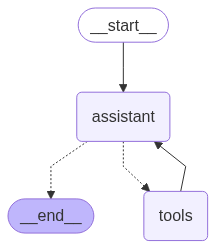

In [6]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

builder = StateGraph(MessagesState)

builder.add_node("assistant",asistance)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools","assistant")

graph = builder.compile()

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [7]:

messages = [HumanMessage(content="Hi, what is 4 + 5")]
messages = graph.invoke({"messages":messages})

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='ac99f264-9b20-4823-b2dc-042993096459'
content='' additional_kwargs={'tool_calls': [{'id': 'call_hN9cwouO3jPWbj3Zah54M0TT', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoX82KtKwtYGUeKLeFmkvNDYXT1t9', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--58420a77-f848-4bc1-b431-55a153de25f9-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_hN9cwouO3jPWbj3Zah54M0TT', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

Adding memory

In [9]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

In [11]:
# specify the thread
config = {"configurable":{"thread_id":1}}

#input
messages = [HumanMessage(content="Hi, what is 4 + 5")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='9667a756-2286-429a-ac7d-f02858c23c4e'
content='' additional_kwargs={'tool_calls': [{'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXCgfkA3kKy81SFkppvWUDytLAGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--11fad7a9-de8d-46c0-832a-a5985c2b4016-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [12]:
#input
messages = [HumanMessage(content="multiply that by 2")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='9667a756-2286-429a-ac7d-f02858c23c4e'
content='' additional_kwargs={'tool_calls': [{'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXCgfkA3kKy81SFkppvWUDytLAGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--11fad7a9-de8d-46c0-832a-a5985c2b4016-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [13]:
# specify the thread
config = {"configurable":{"thread_id":2}}
#input
messages = [HumanMessage(content="Hi, what is 3 + 3")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 3 + 3' additional_kwargs={} response_metadata={} id='1655cde0-3153-4674-a1fc-c8b4859490c9'
content='' additional_kwargs={'tool_calls': [{'id': 'call_Fx50KLkgsg19JwstD2TLEiTG', 'function': {'arguments': '{"a":3,"b":3}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXF3kDMfP1TJSp7x3pdV2YYlFAwc', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--ca63200a-2e25-460d-8c72-6d5165ce4e4c-0' tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 3}, 'id': 'call_Fx50KLkgsg19JwstD2TLEiTG', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [14]:
messages = [HumanMessage(content="multiply that by 2")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 3 + 3' additional_kwargs={} response_metadata={} id='1655cde0-3153-4674-a1fc-c8b4859490c9'
content='' additional_kwargs={'tool_calls': [{'id': 'call_Fx50KLkgsg19JwstD2TLEiTG', 'function': {'arguments': '{"a":3,"b":3}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXF3kDMfP1TJSp7x3pdV2YYlFAwc', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--ca63200a-2e25-460d-8c72-6d5165ce4e4c-0' tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 3}, 'id': 'call_Fx50KLkgsg19JwstD2TLEiTG', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [15]:
config = {"configurable":{"thread_id":1}}
messages = [HumanMessage(content="multiply that by 4")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='9667a756-2286-429a-ac7d-f02858c23c4e'
content='' additional_kwargs={'tool_calls': [{'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXCgfkA3kKy81SFkppvWUDytLAGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--11fad7a9-de8d-46c0-832a-a5985c2b4016-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [16]:
messages = [HumanMessage(content="DIVIDE that by 2")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='9667a756-2286-429a-ac7d-f02858c23c4e'
content='' additional_kwargs={'tool_calls': [{'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXCgfkA3kKy81SFkppvWUDytLAGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--11fad7a9-de8d-46c0-832a-a5985c2b4016-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output

In [17]:
messages = [HumanMessage(content="DIVIDE that by 2")]
messages = graph.invoke({"messages":messages}, config)

for m in messages["messages"]:
  print(m)

content='Hi, what is 4 + 5' additional_kwargs={} response_metadata={} id='9667a756-2286-429a-ac7d-f02858c23c4e'
content='' additional_kwargs={'tool_calls': [{'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 117, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BoXCgfkA3kKy81SFkppvWUDytLAGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--11fad7a9-de8d-46c0-832a-a5985c2b4016-0' tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_XxGdWb7PJHaIGgv8DkM6YZng', 'type': 'tool_call'}] usage_metadata={'input_tokens': 117, 'output